# imports

In [1]:
import torch
import numpy as np
import torch.nn as nn

import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary

from models.AE import AutoEncoder

# Load the data

In [2]:
batch_size = 32

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, drop_last=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Define the structure of the neural network

In [5]:
net = Autoencoder(trainset[0][0][None], input_channels=1, enc_output_channels=[32, 64, 64, 64],
                    enc_kernel_size=[3, 3, 3, 3], enc_padding=[1, 1, 0, 1], enc_strides=[1, 2, 2, 1],
                    dec_output_channels=[64, 64, 32, 1], dec_kernel_size=[3, 3, 3, 3], dec_strides=[1, 2, 2, 1],
                    dec_padding=[1, 0, 1, 1], dec_op_padding=[0, 1, 1, 0], z_dim=2).to('cuda')

In [6]:
opt = torch.optim.Adam(net.parameters(), lr=0.0005, betas=(.9, .99), weight_decay=1e-2)
loss_fn = F.mse_loss
net = net.train()

summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         LeakyReLU-2           [-1, 32, 28, 28]               0
       BatchNorm2d-3           [-1, 32, 28, 28]              64
           Dropout-4           [-1, 32, 28, 28]               0
            Conv2d-5           [-1, 64, 14, 14]          18,496
         LeakyReLU-6           [-1, 64, 14, 14]               0
       BatchNorm2d-7           [-1, 64, 14, 14]             128
           Dropout-8           [-1, 64, 14, 14]               0
            Conv2d-9             [-1, 64, 6, 6]          36,928
        LeakyReLU-10             [-1, 64, 6, 6]               0
      BatchNorm2d-11             [-1, 64, 6, 6]             128
          Dropout-12             [-1, 64, 6, 6]               0
           Conv2d-13             [-1, 64, 6, 6]          36,928
        LeakyReLU-14             [-1, 6

# Train the autoencoder

In [7]:
loss_arr = []
loss_epoch_arr = []
max_epochs = 20

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, _ = data
        inputs = inputs.to("cuda")

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, inputs)
        loss.backward()
        
        opt.step()
        
        loss_arr.append(loss.item())
        
        if i % 500 == 0:
          print('\t\t Epoch: %d/%d, Intermediate Loss: %0.4f' % (epoch, max_epochs, loss.item()))

    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Loss: %0.4f' % (epoch, max_epochs, loss.item()))

		 Epoch: 0/20, Intermediate Loss: 0.3570
		 Epoch: 0/20, Intermediate Loss: 0.0595
		 Epoch: 0/20, Intermediate Loss: 0.0541
		 Epoch: 0/20, Intermediate Loss: 0.0571
Epoch: 0/20, Loss: 0.0520
		 Epoch: 1/20, Intermediate Loss: 0.0560
		 Epoch: 1/20, Intermediate Loss: 0.0591
		 Epoch: 1/20, Intermediate Loss: 0.0564
		 Epoch: 1/20, Intermediate Loss: 0.0615
Epoch: 1/20, Loss: 0.0597
		 Epoch: 2/20, Intermediate Loss: 0.0553
		 Epoch: 2/20, Intermediate Loss: 0.0573
		 Epoch: 2/20, Intermediate Loss: 0.0558
		 Epoch: 2/20, Intermediate Loss: 0.0576
Epoch: 2/20, Loss: 0.0593
		 Epoch: 3/20, Intermediate Loss: 0.0582
		 Epoch: 3/20, Intermediate Loss: 0.0556
		 Epoch: 3/20, Intermediate Loss: 0.0591
		 Epoch: 3/20, Intermediate Loss: 0.0589
Epoch: 3/20, Loss: 0.0576
		 Epoch: 4/20, Intermediate Loss: 0.0569
		 Epoch: 4/20, Intermediate Loss: 0.0531
		 Epoch: 4/20, Intermediate Loss: 0.0532
		 Epoch: 4/20, Intermediate Loss: 0.0534
Epoch: 4/20, Loss: 0.0553
		 Epoch: 5/20, Intermediate L

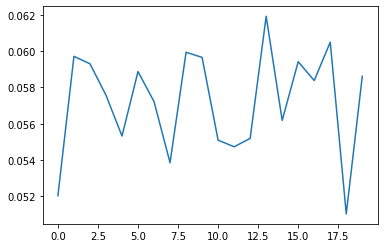

In [9]:
plt.plot(loss_epoch_arr)
plt.show()

In [10]:
print(loss.item())
torch.save(net.state_dict(), 'run/state_dicts/03_01.pth')

0.05861428380012512
